# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import os
import re
import requests

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tweet=pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)

In [5]:
folder='neural_predictions'
if  not os.path.exists(f'udacity_wrangling_project/{folder}'):
    os.makedirs(f'udacity_wrangling_project/{folder}')

In [6]:
path=os.path.join('udacity_wrangling_project',folder,url.split("/")[-1])

In [7]:
with open(path,mode="wb") as file:
    file.write(response.content)

In [8]:
imagePred=pd.read_csv(path,sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
import tweepy

In [10]:
import json

In [11]:
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [12]:
#tweet_info=api.get_status('892420643555336193', tweet_mode='extended',wait_on_rate_limit_notify=True,wait_on_rate_limit=True,indent=4,ensure_ascii=False)

In [13]:
tweets=tweet.tweet_id.values
len(tweets)

2356

In [14]:
#%%timeit
#failures={}
#with open('tweet_id.txt','w') as file:
#    for i,tweet in enumerate(tweets):
#        print(str(tweet)+ " :" + str(1+i))
#        try:
#            info=api.get_status(tweet, tweet_mode='extended',wait_on_rate_limit_notify=True,wait_on_rate_limit=True)
#            print('success')
#            json.dump(info._json,file)
#            file.write('/n')
#        except tweepy.TweepError as e:
#            print('fail')
#            failures['tweet_id']=e
        

In [15]:
list(range(5))

[0, 1, 2, 3, 4]

In [16]:
with open('tweet_id.txt',"r",encoding='utf-8') as file:
    tweet_id,retweet_count,favorite_count=[],[],[]
    dic=[]
    for line in file:
        #data=file.readlines()[0]
        json_file=json.loads(line)
        twee=json_file['id']
        Retweet_count=json_file['retweet_count']
        Favorite_count=json_file['favorite_count']
        dic.append({'tweet_id':twee,'retweet_count':Retweet_count,'favorite_count':Favorite_count})

In [17]:
tweet_extra=pd.DataFrame(dic,columns=['tweet_id','retweet_count','favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [18]:
tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
tweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
tweet[tweet.duplicated('tweet_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [22]:
tweet.text.str[-24:]

0        https://t.co/MgUWQ76dJU
1        https://t.co/0Xxu71qeIV
2        https://t.co/wUnZnhtVJB
3        https://t.co/tD36da7qLQ
4        https://t.co/AtUZn91f7f
5        https://t.co/kQ04fDDRmh
6        https://t.co/tVJBRMnhxl
7        https://t.co/v0nONBcwxq
8        https://t.co/9TwLuAGH0b
9        https://t.co/t1bfwz5S2A
10       https://t.co/dVPW0B0Mme
11       https://t.co/u1XPQMl29g
12       https://t.co/BxvuXk0UCm
13       https://t.co/f8dEDcrKSR
14       https://t.co/y70o6h3isq
15       https://t.co/WpHvrQedPb
16       https://t.co/chxruIOUJN
17       https://t.co/HTQ77yNQ5K
18       https://t.co/YnYAFCTTiK
19       https://t.co/cLyzpcUcMX
20       https://t.co/DK7iDPfuRX
21       https://t.co/PhrUk20Q64
22       https://t.co/20VrLAA8ba
23       https://t.co/cLyzpcUcMX
24       https://t.co/WZqNqygEyV
25       https://t.co/4Ad1jzJSdp
26       https://t.co/I6oNy0CgiT
27       https://t.co/ISvKOSkd5b
28       https://t.co/BCoWue0abA
29       https://t.co/RGE08MIJox
          

In [23]:
tweet.iloc[20]

tweet_id                                                     888078434458587136
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-20 16:49:33 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Gerald. He was just told he didn't get...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/888078434...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

In [24]:
tweet.source[8]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [25]:
#checking if in_reply_to_status_id and in_reply_to_user_i=id columns are the same
non_null_reply=tweet[tweet['in_reply_to_status_id'].isnull()].index

In [26]:
tweet.drop(non_null_reply).head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [27]:
tweet.text.head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

In [28]:
tweet.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
tweet.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [30]:
tweet.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [31]:
tweet.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
an            7
Toby          7
Buddy         7
Daisy         7
Bailey        7
Dave          6
Jax           6
Bella         6
Rusty         6
Scout         6
Leo           6
Koda          6
Oscar         6
Milo          6
Stanley       6
Jack          6
Larry         5
           ... 
Beya          1
Ralph         1
Cheesy        1
Crouton       1
Stella        1
Zara          1
Flash         1
Snoopy        1
Willem        1
Sephie        1
Opie          1
Aqua          1
Ambrose       1
Katie         1
Torque        1
Gòrdón        1
Ito           1
Ralphie       1
Strider       1
Hermione      1
Pumpkin       1
Edmund        1
Bobby         1
Lacy          1
Shooter       1
Heinrich      1
Kawhi         1
Filup         1
Kollin        1
Ralphy        1
Name: name, Length: 957,

In [32]:
tweet[tweet.name=='a'].text

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

In [33]:
tweet[tweet.name=='an'].text

759     RT @dog_rates: This is an East African Chalupa...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1362    This is an East African Chalupa Seal. We only ...
2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

In [34]:
tweet.expanded_urls[1]

'https://twitter.com/dog_rates/status/892177421306343426/photo/1'

In [35]:
#Checking the columns that are retweets(they are )
tweet[tweet.text.str[:4]=="RT @"].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
818,770743923962707968,NaN,NaN,2016-08-30 22:04:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a doggo blowing bubbles....,7.392382e+17,4.196984e+09,2016-06-04 23:31:25 +0000,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,None,None,None
937,753298634498793472,NaN,NaN,2016-07-13 18:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carly. She's actually 2...,6.815232e+17,4.196984e+09,2015-12-28 17:12:42 +0000,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None
231,847971574464610304,NaN,NaN,2017-04-01 00:39:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @basic_vacek_: I love my new mug easy 13/10...,8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000,https://twitter.com/basic_vacek_/status/847971...,13,10,None,None,None,None,None
438,820013781606658049,NaN,NaN,2017-01-13 21:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oliver. He has dreams o...,8.199522e+17,4.196984e+09,2017-01-13 17:00:21 +0000,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,None,None,None,puppo
868,761750502866649088,NaN,NaN,2016-08-06 02:27:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Tristan do not speak to me wit...",6.853251e+17,4.196984e+09,2016-01-08 05:00:14 +0000,https://twitter.com/dog_rates/status/685325112...,10,10,None,None,None,None,None


In [36]:
#Confirming that these are the wrong links and checking the rest
(tweet.source.str.extract(r'(http.+iphone)')!='http://twitter.com/download/iphone')[0].sum()

135

In [37]:
#Checkingif the rest are valid
tweet[tweet.source.str.extract(r'(http.+iphone)')[0].isnull()].sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
699,786286427768250368,NaN,NaN,2016-10-12 19:24:27 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,NaN,NaN,NaN,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
954,751793661361422336,NaN,NaN,2016-07-09 15:02:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Fred. He's having one heck of a summer...,NaN,NaN,NaN,https://vine.co/v/5W5YHdTJvaV,11,10,Fred,None,None,None,None
1313,706904523814649856,NaN,NaN,2016-03-07 18:09:06 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Ever seen a dog pet another dog? Both 13/10 tr...,NaN,NaN,NaN,https://vine.co/v/iXQAm5Lrgrh,13,10,None,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None


In [38]:
tweet.text[0]
tweet.text.str.extract(r'((\d+)/(\d+))')

,0,1,2
0,13/10,13,10
1,13/10,13,10
2,12/10,12,10
3,13/10,13,10
4,12/10,12,10
5,13/10,13,10
6,13/10,13,10
7,13/10,13,10
8,13/10,13,10
9,14/10,14,10


In [39]:
#Checking if the numerators are correct 
tweet[tweet.rating_numerator.astype(str)!=tweet.text.str.extract(r'((\d+)/\d+)')[1]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None


In [40]:
#Checking if the denominators are correct
tweet[tweet.rating_denominator.astype(str)!=tweet.text.str.extract(r'((\d+)/(\d+))')[2]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [41]:
imagePred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [42]:
imagePred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
imagePred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [44]:
imagePred.groupby(['tweet_id'])['p1_conf','p2_conf'].max()

,p1_conf,p2_conf
tweet_id,,
666020888022790149,0.465074,0.156665
666029285002620928,0.506826,0.074192
666033412701032449,0.596461,0.138584
666044226329800704,0.408143,0.360687
666049248165822465,0.560311,0.243682
666050758794694657,0.651137,0.263788
666051853826850816,0.933012,0.045885
666055525042405380,0.692517,0.058279
666057090499244032,0.962465,0.014594


In [45]:
imagePred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [46]:
imagePred.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [47]:
imagePred.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [48]:
imagePred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [49]:
imagePred.duplicated('tweet_id').sum()

0

### Quality issues
1.non null values of 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' are retweets

2.'in_reply_to_status_id','in_reply_to_user_id' columns in the `tweet` table have missing data

3.The 'source' column in the `tweet` table has a wrong link contained in the text column

4.The 'text' 'column' still has links in it

5.'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp','retweeted_status_id', 'retweeted_status_user_id'
in the `tweet` table has the wrong datatypes

6.The names ("a" and "an","this","the") in the 'name' column of the `tweet` table should be none

7.fill the remaining expanded links

8.'tweet_id' and 'img_num' from the `imagePred` table has the wrong datatype

9. In the `imagePred` table, and non dog predictions are not needed





### Tidiness issues
1.doggo ,floofer ,pupper ,puppo and doggo columns are categories                     

2.All data belongs with the tweet table(makes analysis easier)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [50]:
# Make copies of original pieces of data
tweet_clean=tweet.copy()
imagePred_clean=imagePred.copy()

In [51]:
tweet_extra_clean=tweet_extra.copy()

### Issue #1:

#### Define: 
Remove all rows with values for 'retweeted_status_id','retweeted_status_user_id' and 'retweeted_status_timestamp'
columns and the columns themselves

#### Code

In [52]:
tweet_clean[tweet_clean.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [53]:
#Checking the number of null values in retweeted_status_id column
tweet_clean.retweeted_status_id.isnull().sum()

2175

In [54]:
#Checking the number of null values in retweeted_status_user_id column
tweet_clean.retweeted_status_user_id.isnull().sum()

2175

In [55]:
#Checking the number of null values in retweeted_status_timestamp column
tweet_clean.retweeted_status_timestamp.isnull().sum()

2175

In [56]:
#checking if the null values are in the same position
(tweet_clean[tweet_clean.retweeted_status_id.isnull()].index == tweet_clean[tweet_clean.retweeted_status_user_id.isnull()].index)

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [57]:
#checking if the null values are in the position
(tweet_clean[tweet_clean.retweeted_status_id.isnull()].index == tweet_clean[tweet_clean.retweeted_status_timestamp.isnull()].index).sum()

2175

In [58]:
#Dropping the non-null values and retweet columns
tweet_clean=tweet_clean[tweet_clean.retweeted_status_id.isnull()].drop(columns=["retweeted_status_id","retweeted_status_timestamp","retweeted_status_user_id"])


#### Test

In [59]:
tweet_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #2:

#### Define
-Remove columns as the non null values are too small to be used with drop method

#### Code

In [60]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


In [61]:
tweet_clean=tweet_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'])

#### Test

In [62]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue3

#### Define

get the actual source from the text using string slicing

In [63]:
#Confirming the number of links that are availaible in the text
(tweet_clean.text.str[-24:-11]==" https://t.co").sum()

2103

#### Code

In [64]:
tweet_clean.source=(tweet_clean.text.str[-24:])

#### Test

In [65]:
tweet_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,https://t.co/AtUZn91f7f,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue4

#### Define

slicing only the text without the links

#### Code


In [66]:
tweet_clean.text=tweet_clean.text.str[:-24]

#### Test

In [67]:
#No more links
tweet_clean.text.sample(5).str[-24:]

1903     heist to steal this dog
1756    es awful decisions. 8/10
1292    . 10/10 deep breaths pup
417     fficially crushed. 13/10
927      fluffy than they appear
Name: text, dtype: object

### Issue5

#### Define

-Correct the datatypes with astype method

#### Code

In [68]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [69]:
tweet_clean.tweet_id=tweet_clean.tweet_id.astype('str')

In [70]:
tweet_clean.timestamp=pd.to_datetime(tweet_clean.timestamp)

### Issue6

#### Define

use replace to change obsure names like a,an e.t.c to None

#### Code

In [71]:
tweet_clean.name=tweet_clean.name.replace(['a','an','the','this','quite'],['None','None','None','None','None'])

#### Test

In [72]:
((tweet_clean.name=='a')| (tweet_clean.name=='an')|(tweet_clean.name=='the')|(tweet_clean.name=="this")).sum()

0

### Issue7

#### Define

pad  tweet ids with https://twitter.com/dog_rates/status/
    to form an expanded link for the null columns

### Code


In [73]:

tweet_clean.expanded_urls[1]

'https://twitter.com/dog_rates/status/892177421306343426/photo/1'

In [74]:
tweet_clean.loc[tweet_clean.expanded_urls.isnull(),'expanded_urls']=("https://twitter.com/dog_rates/status/"+tweet_clean[tweet_clean.expanded_urls.isnull()].tweet_id).values 

#### Test

In [75]:
tweet_clean.expanded_urls.isnull().sum()

0

### Issue 8


#### Define

Chnge wrong datatypes of imagPred with astype

#### Code

In [76]:
imagePred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [77]:
imagePred_clean=imagePred_clean.astype({'tweet_id':'str','img_num':'category'})

### Test

In [78]:
imagePred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 138.1+ KB


### Issue 9

#### Define

create a new column that has dog values and using p1 first then p2 for p1's non dog predictions and the rest rows were dropped along with  p3,p3_dog,p3_conf columns

#### code

In [79]:
#true
tr=imagePred_clean.p2_conf[imagePred_clean.p1_dog==False][imagePred_clean.p2_dog[imagePred_clean.p1_dog==False]].index


In [80]:
#false
fa=imagePred_clean.p2_dog[imagePred_clean.p1_dog==False].drop(tr).index

In [81]:
dog=pd.concat([imagePred_clean.p1[imagePred_clean.p1_dog==True],imagePred_clean.p2[tr]])

In [82]:
dog

0               Welsh_springer_spaniel
1                              redbone
2                      German_shepherd
3                  Rhodesian_ridgeback
4                   miniature_pinscher
5                 Bernese_mountain_dog
7                                 chow
9                     miniature_poodle
10                    golden_retriever
11                       Gordon_setter
12                        Walker_hound
13                                 pug
14                          bloodhound
15                               Lhasa
16                      English_setter
19                   Italian_greyhound
20                         Maltese_dog
23                    golden_retriever
24                            malamute
26         soft-coated_wheaten_terrier
27                           Chihuahua
28             black-and-tan_coonhound
30                         toy_terrier
31                    Blenheim_spaniel
32                            Pembroke
34            Chesapeake_

In [83]:
imagePred_clean.drop(fa,inplace=True)

In [84]:
imagePred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [85]:
imagePred_clean=pd.concat([imagePred_clean,dog],axis=1).reset_index(drop=True)

In [86]:
imagePred_clean.rename(columns={0:'Dog'},inplace=True)


In [87]:
imagePred_clean.drop(columns=['p3_dog','p3','p3_conf'],inplace=True)

### Test

In [88]:
imagePred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,Dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,miniature_pinscher


In [89]:
imagePred_clean[imagePred_clean.duplicated('tweet_id')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,Dog


### Issue1(tidiness)

#### Define

Use pd.melt to turn ('doggo', 'floofer',
       'pupper', 'puppo') columns into values and remove redundant values

#### Code

In [90]:
tweet_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [91]:
tweet_clean=pd.melt(tweet_clean,id_vars=tweet_clean.drop(columns=['doggo', 'floofer',
       'pupper', 'puppo']),var_name='Type',value_name="type").drop(columns=['Type'])

In [92]:
tweet_clean.type=tweet_clean.type.astype('category')

In [93]:
tweet_clean.drop_duplicates(inplace=True)

In [94]:
tweet_clean.drop((tweet_clean[tweet_clean.duplicated('tweet_id')][tweet_clean[tweet_clean.duplicated('tweet_id')].type=='None'].index),inplace=True)

In [95]:
no=tweet_clean[tweet_clean.duplicated('tweet_id')].tweet_id.values

In [96]:
for n in no:
    mask=tweet_clean.tweet_id==n
    x=0
    if mask.sum()>1:
        x+=1
        tweet_clean.loc[mask,'tweet_id']=tweet_clean.loc[mask,'tweet_id'].iloc[1]

In [97]:
tweet_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
0,892420643555336193,2017-08-01 16:23:56,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,https://t.co/AtUZn91f7f,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [98]:
##no more redundant values
tweet_clean[tweet_clean.type=='None'].duplicated('tweet_id').sum()

0

### issue2(tidiness)

#### Define

#### Code

In [99]:
master1=pd.merge(tweet_clean,imagePred_clean,how='inner',on='tweet_id')

In [100]:
tweet_extra_clean.tweet_id=tweet_extra_clean.tweet_id.astype('str')

In [101]:
twitter_archive_master=pd.merge(master1,tweet_extra_clean,how='left',on='tweet_id')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [102]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [103]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824 entries, 0 to 1823
Data columns (total 20 columns):
tweet_id              1824 non-null object
timestamp             1824 non-null datetime64[ns]
source                1824 non-null object
text                  1824 non-null object
expanded_urls         1824 non-null object
rating_numerator      1824 non-null int64
rating_denominator    1824 non-null int64
name                  1824 non-null object
type                  1824 non-null category
jpg_url               1824 non-null object
img_num               1824 non-null category
p1                    1824 non-null object
p1_conf               1824 non-null float64
p1_dog                1824 non-null bool
p2                    1824 non-null object
p2_conf               1824 non-null float64
p2_dog                1824 non-null bool
Dog                   1824 non-null object
retweet_count         1824 non-null int64
favorite_count        1824 non-null int64
dtypes: bool(2), category(2

In [104]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,Dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,Chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Labrador_retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24,https://t.co/AtUZn91f7f,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17,https://t.co/kQ04fDDRmh,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Chesapeake_Bay_retriever,3261,20562


In [105]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,p1_conf,p2_conf,retweet_count,favorite_count
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,11.399123,10.433662,0.611211,0.137807,2843.332237,9310.416667
std,7.164375,6.166993,0.264220,0.101957,4802.703367,12847.384870
min,0.000000,2.000000,0.044333,0.000010,16.000000,81.000000
25%,10.000000,10.000000,0.383804,0.054914,669.000000,2265.000000
50%,11.000000,10.000000,0.612080,0.121376,1440.000000,4464.000000
75%,12.000000,10.000000,0.853315,0.199547,3261.000000,11590.500000
max,165.000000,150.000000,0.999984,0.467678,79515.000000,132810.000000


In [106]:
twitter_archive_master.Dog.value_counts()

golden_retriever                  176
Labrador_retriever                118
Pembroke                          104
Chihuahua                          98
pug                                67
toy_poodle                         55
Pomeranian                         50
chow                               47
Samoyed                            47
French_bulldog                     35
malamute                           34
Chesapeake_Bay_retriever           32
cocker_spaniel                     31
miniature_pinscher                 28
German_shepherd                    25
Eskimo_dog                         25
Lakeland_terrier                   23
Cardigan                           22
Staffordshire_bullterrier          22
Siberian_husky                     22
Shih-Tzu                           22
Shetland_sheepdog                  21
Rottweiler                         21
Italian_greyhound                  20
Maltese_dog                        20
kuvasz                             19
American_Sta

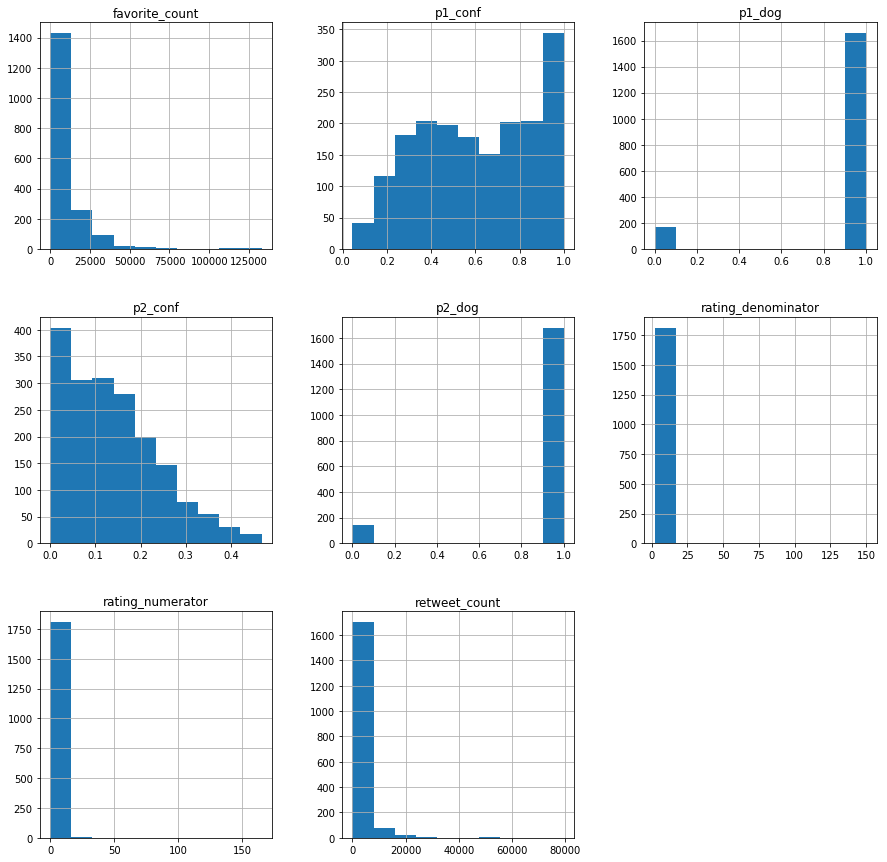

In [107]:
twitter_archive_master.hist(figsize=(15,15));

In [108]:
twitter_archive_master.groupby(['type']).mean()

,rating_numerator,rating_denominator,p1_conf,p1_dog,p2_conf,p2_dog,retweet_count,favorite_count
type,,,,,,,,
None,11.417040,10.506726,0.607408,0.909033,0.137684,0.920564,2645.693145,8862.010890
doggo,11.825397,10.000000,0.593093,0.920635,0.156287,0.920635,6870.079365,18982.158730
floofer,11.875000,10.000000,0.577395,1.000000,0.158096,1.000000,4776.750000,13701.375000
pupper,10.976471,10.000000,0.642474,0.894118,0.131137,0.917647,2542.323529,7909.741176
puppo,12.000000,10.000000,0.703661,0.909091,0.137726,0.954545,6958.500000,22657.181818


### Insights:
1.Dogs who are Doggo or puppo have higher a favorites count on average

2..Dogs who are Doggo or puppo have higher a retweet count on average as well.

3.Majority of dogs rated are not given a type

### Visualization

In [109]:
base=sns.color_palette()[0]

In [110]:
type_cat=twitter_archive_master.type.unique()

In [111]:
max_tick=twitter_archive_master.type.value_counts()[0]

In [112]:
total=twitter_archive_master.tweet_id.nunique()

In [113]:
max_percent=max_tick/total

In [114]:
import numpy as np

In [115]:
ticks=np.arange(0,max_percent,0.10)

In [116]:
ticks

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [117]:
locations=['{:.02f}'.format(v) for v in ticks]

In [118]:
locations

['0.00',
 '0.10',
 '0.20',
 '0.30',
 '0.40',
 '0.50',
 '0.60',
 '0.70',
 '0.80',
 '0.90']

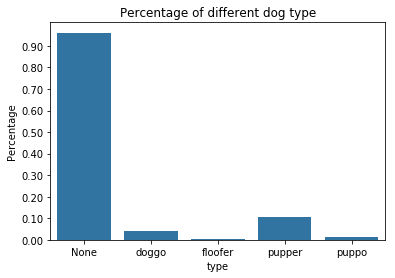

In [119]:
sns.countplot(x='type',data=twitter_archive_master,color=base)
plt.yticks(ticks*total,locations)
plt.title('Percentage of different dog type')
plt.ylabel('Percentage');

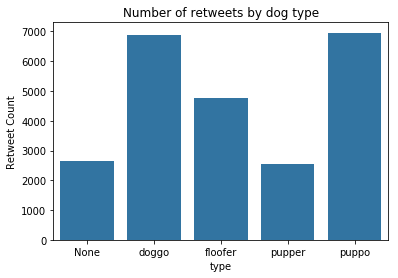

In [120]:
sns.barplot(x='type',y='retweet_count',data=twitter_archive_master,color=base,ci=False)
plt.ylabel('Retweet Count')
plt.title('Number of retweets by dog type');

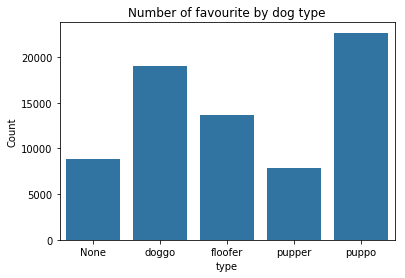

In [121]:
sns.barplot(x='type',y='favorite_count',data=twitter_archive_master,color=base,ci=False)
plt.ylabel('Count')
plt.title('Number of favourite by dog type');